# CS5785 Homework 1 Part II

[Yufan Zhang](https://yufanbruce.com/) (yz2894)


## Preparation

In [1]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore any warnings
import warnings

warnings.filterwarnings("ignore")

In [2]:
# PATH variables
DATA_PATH = "./data/Part_II/"
IMG_PATH = "./img/Part_II/"
RESULT_PATH = "./result/Part_II/"

if not os.path.exists(IMG_PATH):
    os.makedirs(IMG_PATH)

if not os.path.exists(RESULT_PATH):
    os.makedirs(RESULT_PATH)

In [3]:
# Two helper functions to keep or drop features
def keep_features(df, features_to_keep):
    return df[features_to_keep]


def drop_features(df, features_to_drop):
    return df.drop(features_to_drop, axis=1)

## Data Ingestion

In [4]:
# Load the training and test data
def load_data_from_csv(filename):
    """
    Load the data to a Pandas dataframe from a csv file

    Args:
        filename: string containing the path to the dataset

    Return:
        a Pandas dataframe containing the loaded data
    """
    return pd.read_csv(os.path.join(DATA_PATH, filename), index_col=0)

In [5]:
# Load the train data
df = load_data_from_csv("train.csv")
print(f"Shape of the training data: {df.shape}")

df.head()

Shape of the training data: (891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Feature Engineering

In [6]:
# Determine which features to be dropped based on the percentage of NA values in the training data
def get_feature_to_drop_by_hight_na(df_train, feature_list, threshold):
    """
    Determine which features to be dropped based on the percentage of NA values
    in the training data

    Args:
        df_train: a Pandas dataframe containing the training data
        feature_list: a list of features to be checked
        threshold: a float number indicating the threshold of NA percentage

    Return:
        A list containing the features to be dropped
    """
    null_counts = df_train.loc[:, feature_list].isna().sum() / len(df_train)
    return list(null_counts[null_counts > threshold].index)


# Drop the features with NA values more than 50%
features_to_drop_by_hight_na = get_feature_to_drop_by_hight_na(
    df, df.columns, threshold=0.5)

print("The features need to be dropped due to high volumes of NA values:")
print(features_to_drop_by_hight_na)

The features need to be dropped due to high volumes of NA values:
['Cabin']


### Drop Features with High Missing Values & Irrelevant Features

In [7]:
features_to_drop = features_to_drop_by_hight_na + ["Name", "Ticket"]

class FeatureDropper:
    features_to_drop = []
    
    def __init__(self, features_to_drop):
        self.features_to_drop = features_to_drop
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return drop_features(X, self.features_to_drop)
    
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X, y)
    
    def get_feature_names(self):
        return [col for col in self.features_to_drop]
    

# Drop the features
feature_dropper = FeatureDropper(features_to_drop)
df = feature_dropper.fit_transform(df)

In [8]:
# Extract the numerical features
column_types = df.dtypes

num_features = column_types[column_types != "object"].index.tolist()
num_features = [feature for feature in num_features if feature not in ["Survived"]]
print(f"Numerical features: ({len(num_features)})")
print(num_features)
print()

# Extract the categorical features
cat_features = column_types[column_types == "object"].index.tolist()
print(f"Categorical features: ({len(cat_features)})")
print(cat_features)

Numerical features: (5)
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Categorical features: (2)
['Sex', 'Embarked']


In [9]:
# Examine the missing values
missing_value = pd.DataFrame(df.isnull().sum(), columns=["Amount"])
missing_value["Percentage"] = missing_value["Amount"] / df.shape[0] * 100

missing_value

,Amount,Percentage
Survived,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Fare,0,0.000000
Embarked,2,0.224467


### Numerical features

`['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']`

#### Pclass

Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd

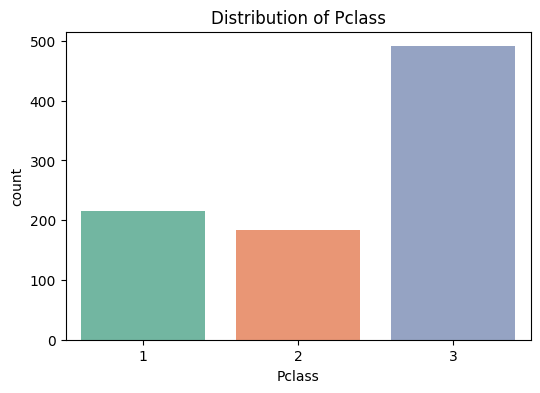

In [10]:
# Examine the distribution of Pclass
plt.figure(figsize=(6, 4))
sns.countplot(x="Pclass", data=df, palette="Set2")
plt.title("Distribution of Pclass")
# Save the figure
plt.savefig(os.path.join(IMG_PATH, "distribution_of_pclass.png"), dpi=300)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


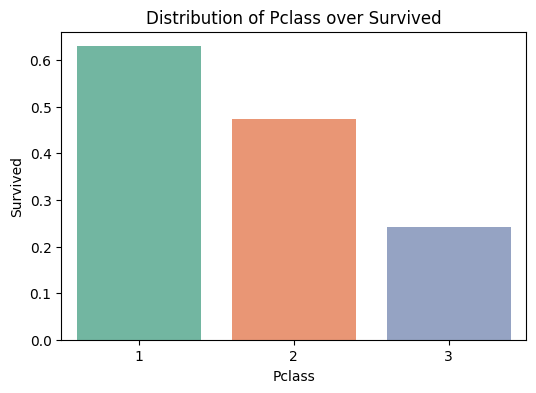

In [11]:
# Examine the distribution of Pclass over Survived
df_temp = df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).apply("mean")

# Visualize the distribution of Pclass over Survived
plt.figure(figsize=(6, 4))
sns.barplot(x=df_temp.index, y=df_temp["Survived"], palette="Set2")
plt.title("Distribution of Pclass over Survived")
# Save the figure
plt.savefig(os.path.join(IMG_PATH, "distribution_of_pclass_over_survived.png"), dpi=300)

df_temp

**Observations**

- The survival rate of the 1st class is the highest, followed by the 2nd class, and the 3rd class has the lowest survival rate.

**Decisions**

- Keep this feature.

In [12]:
# Transform the Pclass feature as described in the analysis above
class PclassTransformer:
    def __init__(self):
        # Create a dictionary to store the mode in case of missing values
        self.mode_dict = {}

    def fit(self, X, y=None):
        self.mode_dict["Pclass"] = X["Pclass"].mode()[0]
        return self

    def transform(self, X):
        # Fill the missing values with the mode
        X["Pclass"] = X["Pclass"].fillna(self.mode_dict["Pclass"])
        return X

    def fit_transform(self, X, y=None):
        return self.fit(X).transform(X)


pclass_transformer = PclassTransformer()
df = pclass_transformer.fit_transform(df)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


#### Age

Age in years

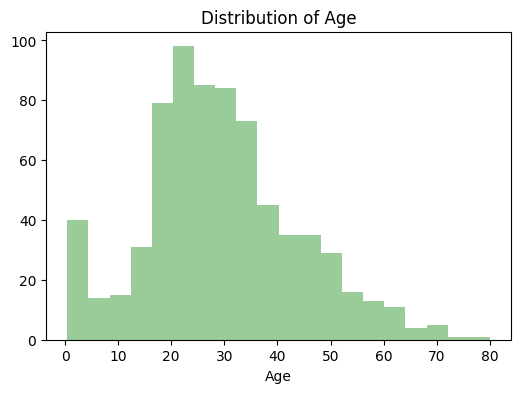

In [13]:
# Examine the distribution of Age
plt.figure(figsize=(6, 4))
sns.distplot(df["Age"], bins=20, kde=False, color="g")
plt.title("Distribution of Age")
# Save the figure
plt.savefig(os.path.join(IMG_PATH, "distribution_of_age.png"), dpi=300)

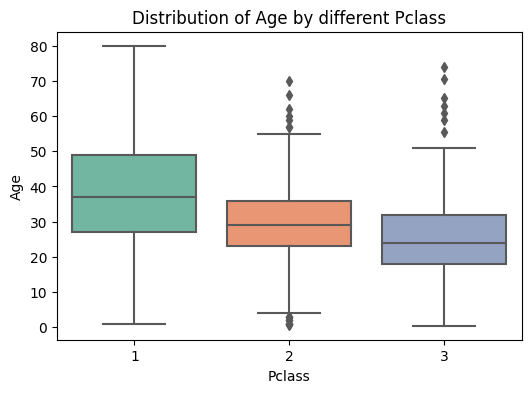

In [14]:
# Examine the distribution of Age by different Pclass
plt.figure(figsize=(6, 4))
sns.boxplot(x="Pclass", y="Age", data=df, palette="Set2")
plt.title("Distribution of Age by different Pclass")
# Save the figure
plt.savefig(os.path.join(IMG_PATH, "distribution_of_age_by_pclass.png"), dpi=300)

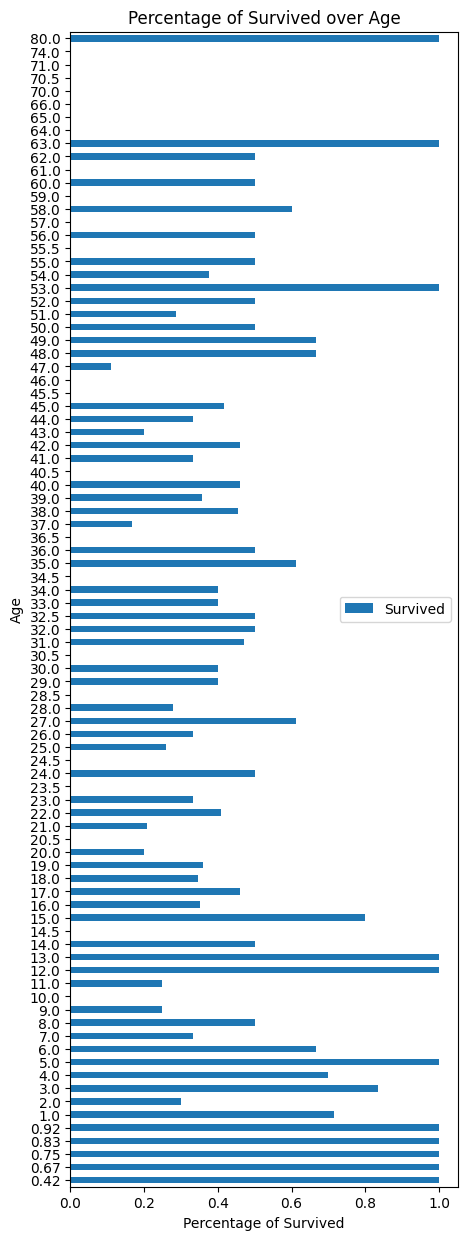

In [15]:
# Examine the percentage of Survived over Age
df_temp = df[["Age", "Survived"]].groupby(["Age"], as_index=True).apply("mean")

# Visualize the percentage of Survived over Age
ax = df_temp.plot(kind="barh", figsize=(5, 15))
ax.set_title("Percentage of Survived over Age")
ax.set_xlabel("Percentage of Survived")
ax.set_ylabel("Age")
# Save the figure
plt.savefig(os.path.join(IMG_PATH, "percentage_of_survived_over_age.png"), dpi=300)

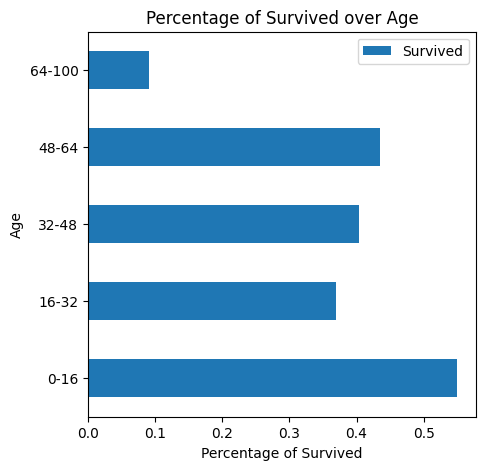

In [16]:
# Create age groups and examine the distribution of Survived over Age
df["AgeGroup"] = pd.cut(df["Age"], bins=[0, 16, 32, 48, 64, 100], labels=["0-16", "16-32", "32-48", "48-64", "64-100"])
df_temp = df[["AgeGroup", "Survived"]].groupby(["AgeGroup"], as_index=True).apply("mean")

# Visualize the distribution of Survived over Age
ax = df_temp.plot(kind="barh", figsize=(5, 5))
ax.set_title("Percentage of Survived over Age")
ax.set_xlabel("Percentage of Survived")
ax.set_ylabel("Age")
# Save the figure
plt.savefig(os.path.join(IMG_PATH, "percentage_of_survived_over_age_group.png"), dpi=300)


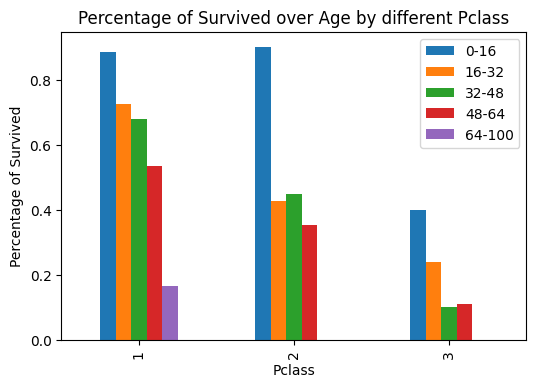

In [17]:
# Examine the distribution of Survived over Age by different Pclass
df_temp = df[["AgeGroup", "Pclass", "Survived"]].groupby(["Pclass", "AgeGroup"], as_index=True).apply("mean")

ax = df_temp.unstack().plot(kind="bar", figsize=(6, 4))
ax.set_title("Percentage of Survived over Age by different Pclass")
ax.set_ylabel("Percentage of Survived")
ax.set_xlabel("Pclass")
ax.legend(["0-16", "16-32", "32-48", "48-64", "64-100"])
# Save the figure
plt.savefig(os.path.join(IMG_PATH, "percentage_of_survived_over_age_by_pclass.png"), dpi=300)

df_temp = df[["AgeGroup", "Pclass", "Survived"]].groupby(["AgeGroup", "Pclass"], as_index=True).apply("mean")

**Observation**

- There are 177 (19.865%) missing values in this feature.
- Most passengers are between 16 and 35 years old.
- The survival rate of passengers under 16 years old is higher than that of passengers over 16 years old.
- The survival rate of passengers within different pclasses is different over different age groups.

**Decisions**

- Keep this feature.
- Fill the missing values with the median age in each Pclass.
- Create a new feature `AgeGroup` to indicate the age group of the passenger.
- Create a new feature `is_child` to indicate whether the passenger is a child (under 16 years old).
- Create a new feature `AgeXPclass` to indicate the interaction between `AgeGroup` and `Pclass`.
- Scale the feature `Age` to [0, 1].

In [18]:
# Transform the Age feature based on the analysis above
class AgeTransformer:
    def __init__(self):
        # Create a dictionary to store the median in case of missing values
        self.median_dict = {}
        self.age_max = 0
        self.age_min = 0

    def fit(self, X, y=None):
        self.median_dict["Age"] = X["Age"].median()
        self.age_max = X["Age"].max()
        self.age_min = X["Age"].min()
        return self

    def transform(self, X):
        # Fill the missing values with the median
        X["Age"] = X["Age"].fillna(self.median_dict["Age"])

        # Create a new feature `AgeGroup`
        X["AgeGroup"] = pd.cut(
            X["Age"],
            bins=[0, 16, 32, 48, 64, 100],
            labels=["0-16", "16-32", "32-48", "48-64", "64-100"],
        )

        # Create a new feature `is_child`
        X["is_child"] = X["AgeGroup"].apply(lambda x: 1 if x == "0-16" else 0)

        # Create a new feature `AgeXPclass`
        X["AgeXPclass"] = X["Age"] * X["Pclass"]

        # Scale the feature `Age`
        X["Age"] = (X["Age"] - self.age_min) / (self.age_max - self.age_min)

        # Drop the AgeGroup feature
        X = drop_features(X, ["AgeGroup"])

        return X

    def fit_transform(self, X, y=None):
        return self.fit(X).transform(X)


age_transformer = AgeTransformer()
df = age_transformer.fit_transform(df)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_child,AgeXPclass
PassengerId,,,,,,,,,,
1,0,3,male,0.271174,1,0,7.2500,S,0,66.0
2,1,1,female,0.472229,1,0,71.2833,C,0,38.0
3,1,3,female,0.321438,0,0,7.9250,S,0,78.0
4,1,1,female,0.434531,1,0,53.1000,S,0,35.0
5,0,3,male,0.434531,0,0,8.0500,S,0,105.0


#### SibSp & Parch

- sibsp - # of siblings / spouses aboard the Titanic	

- parch - # of parents / children aboard the Titanic

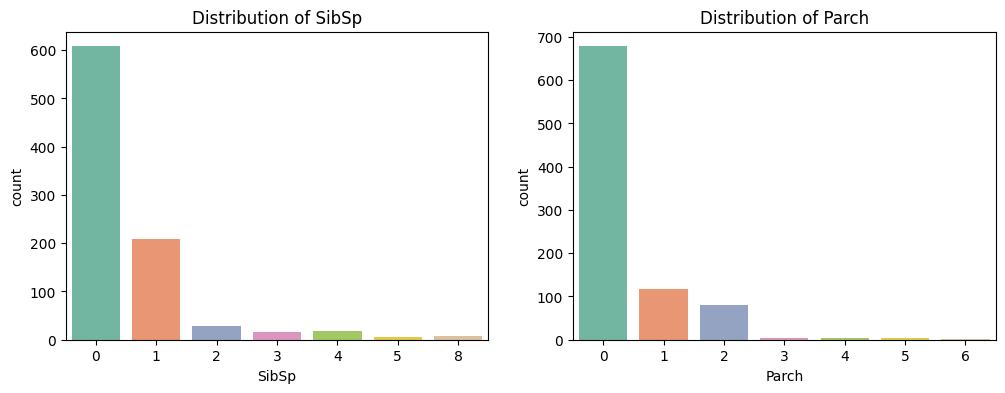

In [19]:
# Examine the distribution of SibSp amd Parch by two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x="SibSp", data=df, palette="Set2", ax=axes[0])
axes[0].set_title("Distribution of SibSp")
sns.countplot(x="Parch", data=df, palette="Set2", ax=axes[1])
axes[1].set_title("Distribution of Parch")
# Save the figure
plt.savefig(os.path.join(IMG_PATH, "distribution_of_sibsp_and_parch.png"), dpi=300)

**Observation**

- Both features describe the number of family members on board.
- Most passengers have no family members with them.

**Decisions**

- Create a new feature `IsAlone` to indicate whether the passenger is alone.
- Drop `SibSp` and `Parch`.

In [20]:
# Transform the SibSp and Parch features based on the analysis above
class SibSpParchTransformer:
    def __init__(self):
        # Store a median of each feature by pclass in case of missing values
        self.sibsp_median = dict()
        self.parch_median = dict()
        
    def fit(self, train_df, y=None):
        # Create a new feature IsAlone
        train_df["IsAlone"] = train_df["SibSp"] + train_df["Parch"]
        train_df["IsAlone"] = train_df["IsAlone"].map({0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0})
        # Store the median of each feature by pclass in case of missing values
        self.sibsp_median = train_df.groupby("Pclass")["SibSp"].median().to_dict()
        self.parch_median = train_df.groupby("Pclass")["Parch"].median().to_dict()
        return self
    
    def transform(self, df):
        # In case of missing values, fill the missing values with the median of each feature by pclass
        df["SibSp"] = df.apply(
            lambda row: self.sibsp_median[row["Pclass"]]
            if np.isnan(row["SibSp"])
            else row["SibSp"],
            axis=1,
        )
        df["Parch"] = df.apply(
            lambda row: self.parch_median[row["Pclass"]]
            if np.isnan(row["Parch"])
            else row["Parch"],
            axis=1,
        )
        # Create a new feature IsAlone
        df["IsAlone"] = df["SibSp"] + df["Parch"]
        df["IsAlone"] = df["IsAlone"].apply(lambda x: 1 if x == 0 else 0)
        # Drop the SibSp and Parch features
        df = drop_features(df, ["SibSp", "Parch"])
        return df
    
    def fit_transform(self, df, y=None):
        return self.fit(df).transform(df)
    
sibsp_parch_transformer = SibSpParchTransformer()
df = sibsp_parch_transformer.fit_transform(df)

df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,is_child,AgeXPclass,IsAlone
PassengerId,,,,,,,,,
1,0,3,male,0.271174,7.2500,S,0,66.0,0
2,1,1,female,0.472229,71.2833,C,0,38.0,0
3,1,3,female,0.321438,7.9250,S,0,78.0,1
4,1,1,female,0.434531,53.1000,S,0,35.0,0
5,0,3,male,0.434531,8.0500,S,0,105.0,1


#### Fare

Fare - Passenger fare

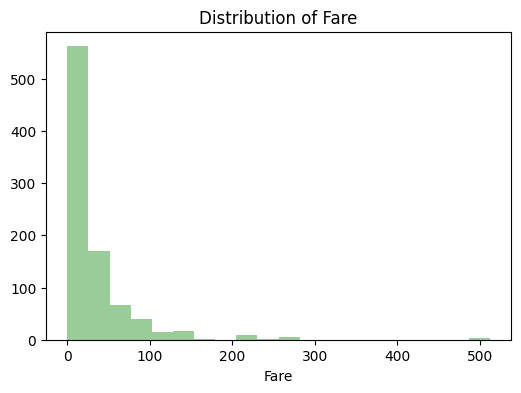

In [21]:
# Examine the distribution of Fare
plt.figure(figsize=(6, 4))
sns.distplot(df["Fare"], bins=20, kde=False, color="g")
plt.title("Distribution of Fare")
# Save the figure
plt.savefig(os.path.join(IMG_PATH, "distribution_of_fare.png"), dpi=300)

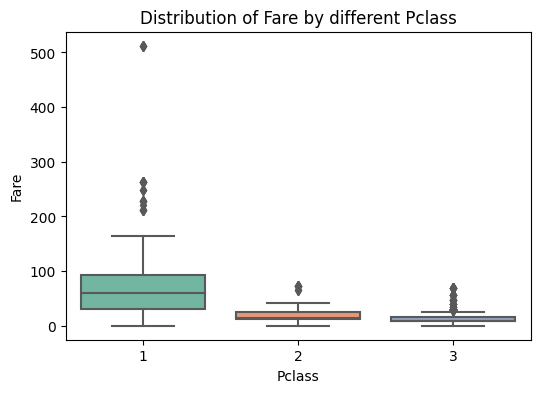

In [22]:
# Examine the distribution of Fare by different Pclass
plt.figure(figsize=(6, 4))
sns.boxplot(x="Pclass", y="Fare", data=df, palette="Set2")
plt.title("Distribution of Fare by different Pclass")
# Save the figure
plt.savefig(os.path.join(IMG_PATH, "distribution_of_fare_by_pclass.png"), dpi=300)


**Observation**

- There is one missing value in this feature.
- There is one outlier in the 1st class whose fare is 512.3292.

**Decisions**

- Fill it with the median fare of the corresponding Pclass as all of the pclass have skewed distribution on fare.
- Create a new feature `FareGroup` to indicate the fare group of the passenger. This will eliminate the effect of outliers.
- Drop `Fare`.

In [23]:
# Transform the Fare feature based on the analysis above
class FareTransformer:
    def __init__(self):
        self.median_fare_by_pclass = dict()
        
    def fit(self, train_df, y=None):
        self.median_fare_by_pclass = train_df.groupby("Pclass")["Fare"].median().to_dict()
        return self
    
    def transform(self, df):
        # Fill the missing values with the median of each Pclass
        df["Fare"] = df.apply(
            lambda row: self.median_fare_by_pclass[row["Pclass"]]
            if np.isnan(row["Fare"])
            else row["Fare"],
            axis=1,
        )
        # Create FareGroup feature
        df["FareGroup"] = pd.qcut(df["Fare"], 4, labels=[0, 1, 2, 3])
        df["FareGroup"] = df["FareGroup"].astype("int")
        df = drop_features(df, ["Fare"])
        return df
    
    def fit_transform(self, df, y=None):
        return self.fit(df).transform(df)
    
fare_transformer = FareTransformer()
df = fare_transformer.fit_transform(df)

df.head()

,Survived,Pclass,Sex,Age,Embarked,is_child,AgeXPclass,IsAlone,FareGroup
PassengerId,,,,,,,,,
1,0,3,male,0.271174,S,0,66.0,0,0
2,1,1,female,0.472229,C,0,38.0,0,3
3,1,3,female,0.321438,S,0,78.0,1,1
4,1,1,female,0.434531,S,0,35.0,0,3
5,0,3,male,0.434531,S,0,105.0,1,1


### Categorical features

`['Sex', 'Embarked']`

#### Sex

,Sex,Count
0,female,314
1,male,577


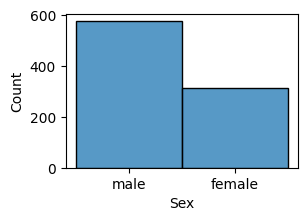

In [24]:
# Examine the distribution of Sex by creating a pie chart
plt.figure(figsize=(3, 2))
sns.histplot(df, x="Sex")
# Save the figure
plt.savefig(os.path.join(IMG_PATH, "distribution_of_sex.png"), dpi=300)

df.groupby("Sex")["Sex"].count().reset_index(name='Count')


In [25]:
# Examine the distribution of Sex over Survived
df[["Sex", "Survived"]].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


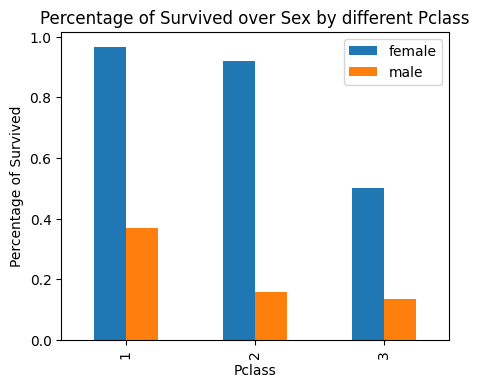

In [26]:
# Examine the distribution of the Survived percentage of Sex in different classes
df_temp = df[["Sex", "Pclass", "Survived"]].groupby(["Pclass", "Sex"], as_index=True).apply("mean")

ax = df_temp.unstack().plot(kind="bar", figsize=(5, 4))
ax.set_title("Percentage of Survived over Sex by different Pclass")
ax.set_ylabel("Percentage of Survived")
ax.set_xlabel("Pclass")
ax.legend(["female", "male"])
# Save the figure
plt.savefig(os.path.join(IMG_PATH, "distribution_of_sex_by_pclass.png"), dpi=300)

**Observation**

- There are more male passengers on board than female passengers.
- The sex distribution of passengers in different pclasses is similar.
- Female passengers has higher change to survive.

**Decisions**

- Transform this feature into a binary feature `IsFemale` (1 - female, 0 - male)
- Drop `Sex`.

In [27]:
class SexTransformer:
    def __init__(self):
        self.mode_sex = None

    def fit(self, train_df, y=None):
        self.mode_sex = train_df["Sex"].mode()[0]
        return self

    def transform(self, df):
        # Fill the missing values with the mode
        df["Sex"] = df["Sex"].fillna(self.mode_sex)
        # Create IsFemale feature
        df["IsFemale"] = df["Sex"].map({"female": 1, "male": 0})
        # Drop the sex feature
        df = drop_features(df, ["Sex"])
        return df

    def fit_transform(self, df, y=None):
        return self.fit(df).transform(df)


sex_transformer = SexTransformer()
df = sex_transformer.fit_transform(df)

df.head()

,Survived,Pclass,Age,Embarked,is_child,AgeXPclass,IsAlone,FareGroup,IsFemale
PassengerId,,,,,,,,,
1,0,3,0.271174,S,0,66.0,0,0,0
2,1,1,0.472229,C,0,38.0,0,3,1
3,1,3,0.321438,S,0,78.0,1,1,1
4,1,1,0.434531,S,0,35.0,0,3,1
5,0,3,0.434531,S,0,105.0,1,1,0


#### Embarked

Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

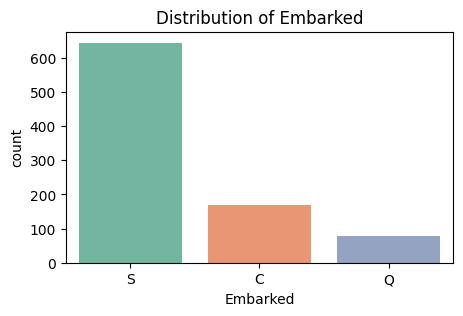

In [28]:
# Examine the distribution of Embarked
plt.figure(figsize=(5, 3))
sns.countplot(x="Embarked", data=df, palette="Set2")
plt.title("Distribution of Embarked")
# Save the figure
plt.savefig(os.path.join(IMG_PATH, "distribution_of_embarked.png"), dpi=300)

In [29]:
# Examine the distribution of Embarked over Survived
df[["Embarked", "Survived"]].groupby("Embarked").mean()


,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


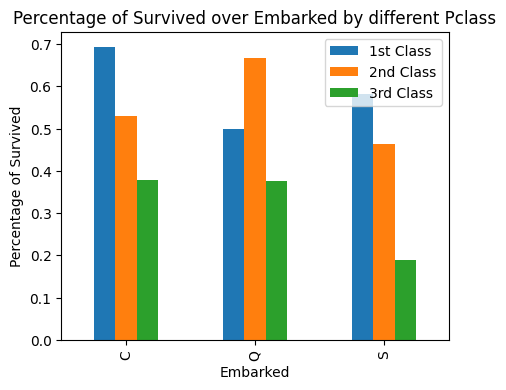

In [30]:
# Examine the distribution of the Survived percentage of Embarked in different classes
df_temp = df[["Embarked", "Pclass", "Survived"]].groupby(["Embarked", "Pclass"], as_index=True).apply("mean")

ax = df_temp.unstack().plot(kind="bar", figsize=(5, 4))
ax.set_title("Percentage of Survived over Embarked by different Pclass")
ax.set_ylabel("Percentage of Survived")
ax.set_xlabel("Embarked")
ax.legend(["1st Class", "2nd Class", "3rd Class"])
# Save the figure
plt.savefig(os.path.join(IMG_PATH, "distribution_of_embarked_by_pclass.png"), dpi=300)

**Observation**

- There are 2 missing values in this feature.
- Most passengers embarked from Southampton.
- The survival rate of passengers embarked from Cherbourg is higher than that of passengers embarked from Queenstown and Southampton.
- But this is probably because most passengers embarked from Cherbourg are from the 1st class.

**Decisions**

- Fill the missing values with the most frequent value (mode).
- One-hot encode this feature.

In [31]:
# Transform the Embarked feature as described in the analysis above
class EmbarkedTransformer:
    def __init__(self):
        self.mode_embarked = None
        self.one_hot_encoder = None

    def fit(self, train_df, y=None):
        self.mode_embarked = train_df["Embarked"].mode()[0]
        df["Embarked"] = df["Embarked"].fillna(self.mode_embarked)
        self.one_hot_encoder = OneHotEncoder("Embarked")
        self.one_hot_encoder.fit(train_df)
        f = self.one_hot_encoder.transform(df)
        return train_df

    def transform(self, df):
        # Fill the missing values with the mode
        df["Embarked"] = df["Embarked"].fillna(self.mode_embarked)
        # One-hot encoding
        df = self.one_hot_encoder.transform(df)
        return df

    def fit_transform(self, df, y=None):
        return self.fit(df)


class OneHotEncoder:
    def __init__(self, feature):
        self.feature = feature
        self.categories = None

    def fit(self, X, y=None):
        self.categories = X[self.feature].unique()
        return self

    def transform(self, X):
        for category in self.categories:
            X[f"{self.feature}_{category}"] = (X[self.feature] == category).astype(int)
        X = drop_features(X, [self.feature])
        return X


embarked_transformer = EmbarkedTransformer()
df = embarked_transformer.fit_transform(df)

df.head()

,Survived,Pclass,Age,Embarked,is_child,AgeXPclass,IsAlone,FareGroup,IsFemale,Embarked_S,Embarked_C,Embarked_Q
PassengerId,,,,,,,,,,,,
1,0,3,0.271174,S,0,66.0,0,0,0,1,0,0
2,1,1,0.472229,C,0,38.0,0,3,1,0,1,0
3,1,3,0.321438,S,0,78.0,1,1,1,1,0,0
4,1,1,0.434531,S,0,35.0,0,3,1,1,0,0
5,0,3,0.434531,S,0,105.0,1,1,0,1,0,0


In [32]:
# Implement the feature engineering pipeline by combining all the transformers
class FeatureEngineer:
    def __init__(self, filename):
        self.filename = filename
        
    def transform(self):
        # Load data
        df = load_data_from_csv(self.filename)
        
        # Drop features
        df = feature_dropper.transform(df)
        
        # Transform Pclass
        df = pclass_transformer.transform(df)
        
        # Transform Age
        df = age_transformer.transform(df)
        
        # Transform SibSp and Parch
        df = sibsp_parch_transformer.transform(df)
        
        # Transform Fare
        df = fare_transformer.transform(df)
        
        # Transform Sex
        df = sex_transformer.transform(df)
        
        # Transform Embarked
        df = embarked_transformer.transform(df)
        
        return df

df = FeatureEngineer("train.csv").transform()

df

,Survived,Pclass,Age,is_child,AgeXPclass,IsAlone,FareGroup,IsFemale,Embarked_S,Embarked_C,Embarked_Q
PassengerId,,,,,,,,,,,
1,0,3,0.271174,0,66.0,0,0,0,1,0,0
2,1,1,0.472229,0,38.0,0,3,1,0,1,0
3,1,3,0.321438,0,78.0,1,1,1,1,0,0
4,1,1,0.434531,0,35.0,0,3,1,1,0,0
5,0,3,0.434531,0,105.0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,0.334004,0,54.0,1,1,0,1,0,0
888,1,1,0.233476,0,19.0,1,2,1,1,0,0
889,0,3,0.346569,0,84.0,0,2,1,1,0,0


## Model Training

In [33]:
# Load the training and test data
y = df["Survived"]
X = drop_features(df, ["Survived"])

X_test = FeatureEngineer("test.csv").transform()

X_test

,Pclass,Age,is_child,AgeXPclass,IsAlone,FareGroup,IsFemale,Embarked_S,Embarked_C,Embarked_Q
PassengerId,,,,,,,,,,
892,3,0.428248,0,103.5,1,0,0,0,0,1
893,3,0.585323,0,141.0,0,0,1,1,0,0
894,2,0.773813,0,124.0,1,1,0,0,0,1
895,3,0.334004,0,81.0,1,1,0,1,0,0
896,3,0.271174,0,66.0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1305,3,0.346569,0,84.0,1,1,0,1,0,0
1306,1,0.484795,0,39.0,1,3,1,0,1,0
1307,3,0.478512,0,115.5,1,0,0,1,0,0


In [34]:
# Split the training data into training and validation sets w/o sklearn
def train_test_split(X, y, test_size=0.2, random_state=10):
    np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(X))
    test_set_size = int(len(X) * test_size)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return X.iloc[train_indices], X.iloc[test_indices], y.iloc[train_indices], y.iloc[test_indices]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Implement logistic regression from scratch
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=10000):
        self.lr = lr
        self.num_iter = num_iter
        self.loss = list()
        self.theta = None

    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def __loss(self, pred, y):
        return -(y * np.log(pred) + (1 - y) * np.log(1 - pred)).mean()

    def __gradient(self, X, pred, y):
        return np.dot(X.T, (pred - y)) / y.size

    def fit(self, X, y):
        # Initialize the weights
        self.theta = np.zeros(X.shape[1])

        # Train the model using gradient descent
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            pred = self.__sigmoid(z)

            # Calculate the loss
            loss = self.__loss(pred, y)
            self.loss.append(loss)

            # Gradient descent
            gradient = self.__gradient(X, pred, y)
            self.theta -= self.lr * gradient

    def predict(self, X):
        z = np.dot(X, self.theta)
        pred = self.__sigmoid(z)
        return pred >= 0.5


# Implement the accuracy score
def accuracy_score(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)


model = LogisticRegression(lr=0.1, num_iter=150000)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

print(f"Accuracy: {accuracy_score(y_val, y_pred)}")

Accuracy: 0.8146067415730337


[[99  6]
 [27 46]]
Precision: 0.8846153846153846
Recall: 0.6301369863013698
F1 score: 0.736


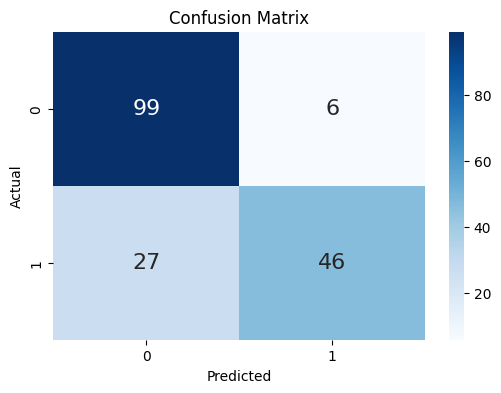

In [43]:
# Plot the confusion matrix on the validation set
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_val, y_pred)
print(confusion_matrix)

# Calculate the precision, recall, and F1 score
from sklearn.metrics import precision_score, recall_score, f1_score

print(f"Precision: {precision_score(y_val, y_pred)}")
print(f"Recall: {recall_score(y_val, y_pred)}")
print(f"F1 score: {f1_score(y_val, y_pred)}")


# Plot the confusion matrix on the validation set
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 16})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig(os.path.join(IMG_PATH, "confusion_matrix.png"), dpi=300)


In [37]:
# Examine the weights of each feature
weights = pd.DataFrame(model.theta, index=X_train.columns, columns=["Weight"])
weights

,Weight
Pclass,-9.937140
Age,31.988659
is_child,9.037811
AgeXPclass,-0.863969
IsAlone,3.696076
FareGroup,-0.611717
IsFemale,63.396897
Embarked_S,11.661376
Embarked_C,20.067069
Embarked_Q,19.275919


In [36]:
import datetime


# Construct the entire pipeline
def predict_test(filename, model):
    X_test = FeatureEngineer(filename).transform()
    # Run the inference
    pred = model.predict(X_test)
    # Save to csv for submission with filename as submission_{current_datetime}.csv
    submission = pd.DataFrame(
        {"PassengerId": X_test.index, "Survived": pred.astype(int)}
    )
    submission.to_csv(
        os.path.join(
            RESULT_PATH,
            "submission_{}.csv".format(
                datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
            ),
        ),
        index=False,
    )
    return pred


# Predict the test data
pred = predict_test("test.csv", model)